In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
df = pd.read_csv("AIDS_Classification.csv")
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


# Null değer kontrolü

In [12]:
df.isnull().values.sum().sum()

0

In [ ]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

# Histogram Grafiği

In [ ]:
# hedef değişken
target = 'infected'
# sürekli değişkenler
cont_cols = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
# kesikli değişkenler
dis_cols = list(set(df.columns) - set([*cont_cols, target]))

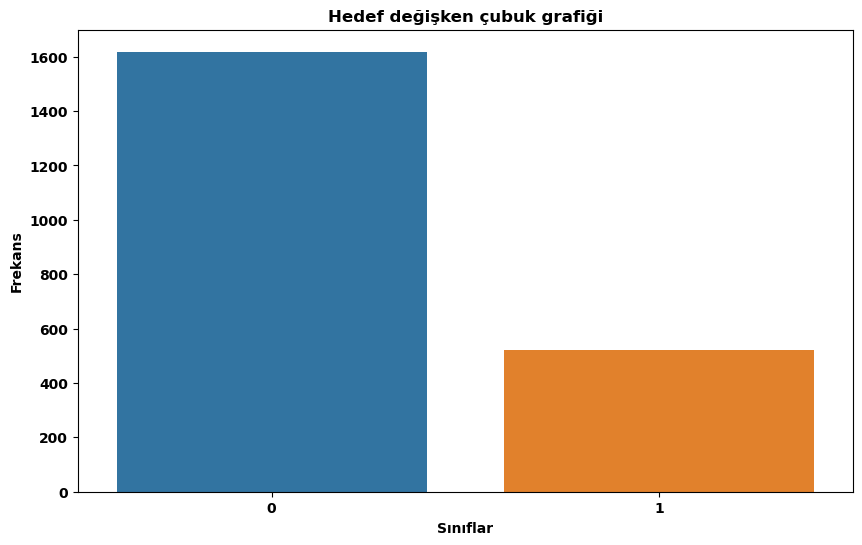

In [ ]:
# öncelikle hedef değişkenimizdeki sınıflara ait çubuk grafiğini çizdirelim
plt.figure(figsize=(10, 6))
sns.countplot(x=target, data=df)
plt.title('Hedef değişken çubuk grafiği')
plt.xlabel('Sınıflar')
plt.ylabel('Frekans')
plt.show()

C:\Users\Muhtesem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhtesem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhtesem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muhtesem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

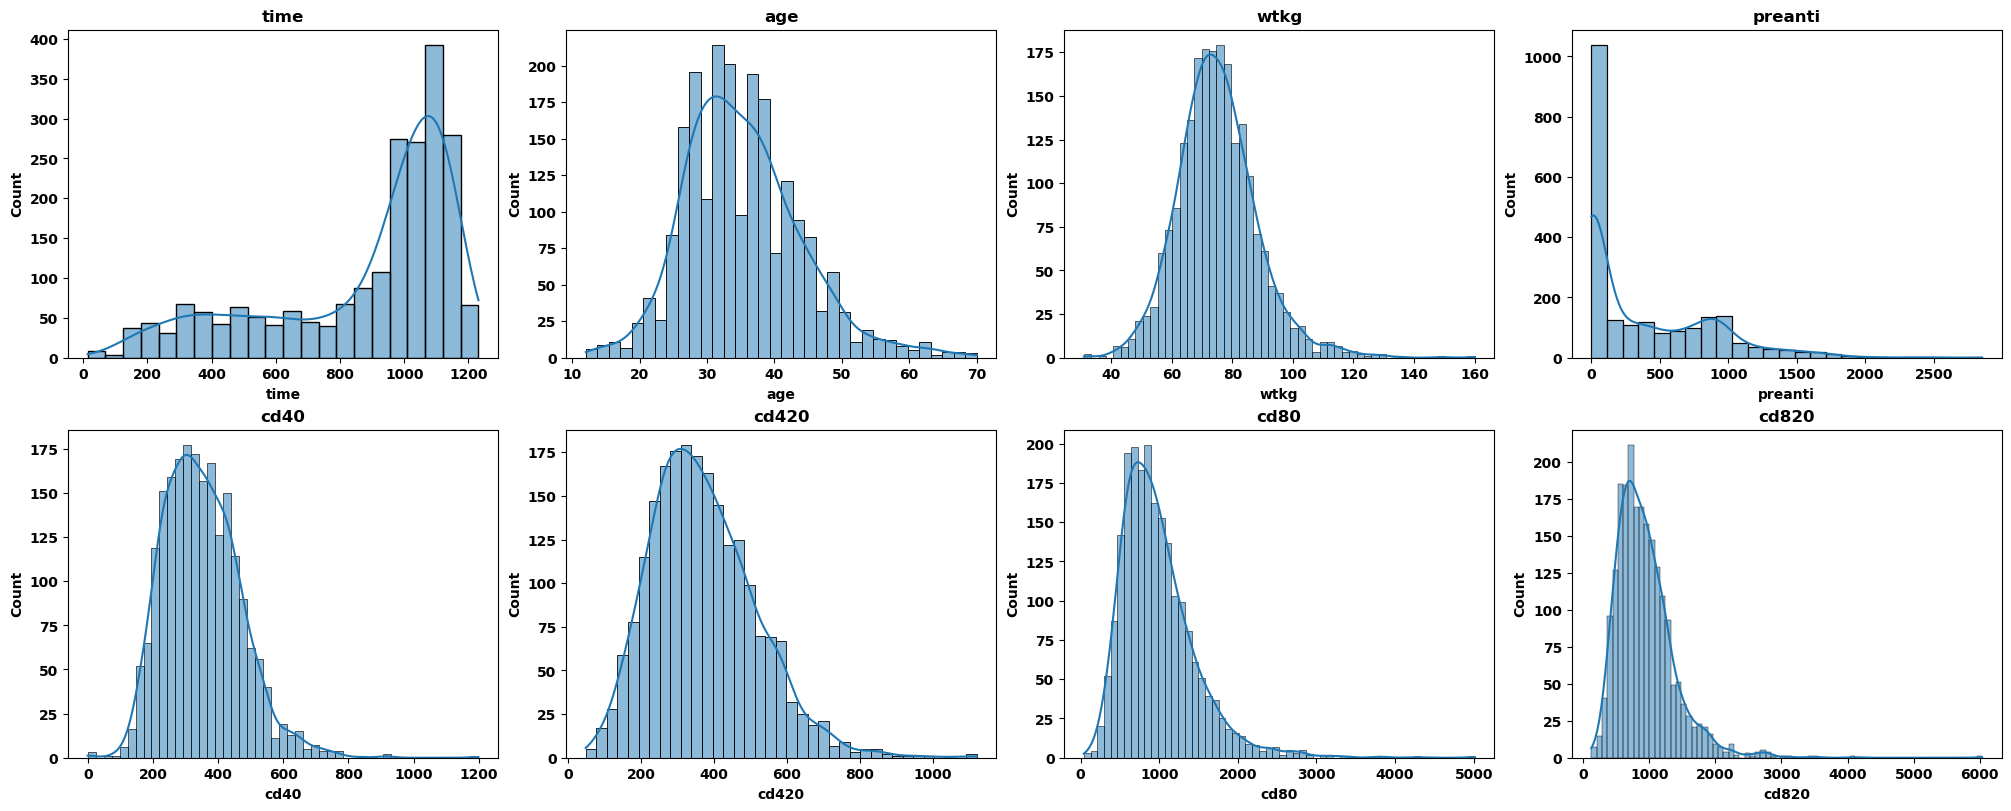

In [ ]:
num_cols = 4
num_rows = int(np.ceil(len(cont_cols) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 4), constrained_layout=True)

for i, column in enumerate(cont_cols):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

Kategorik değişkenler için de histogram grafiklerini çizelim.

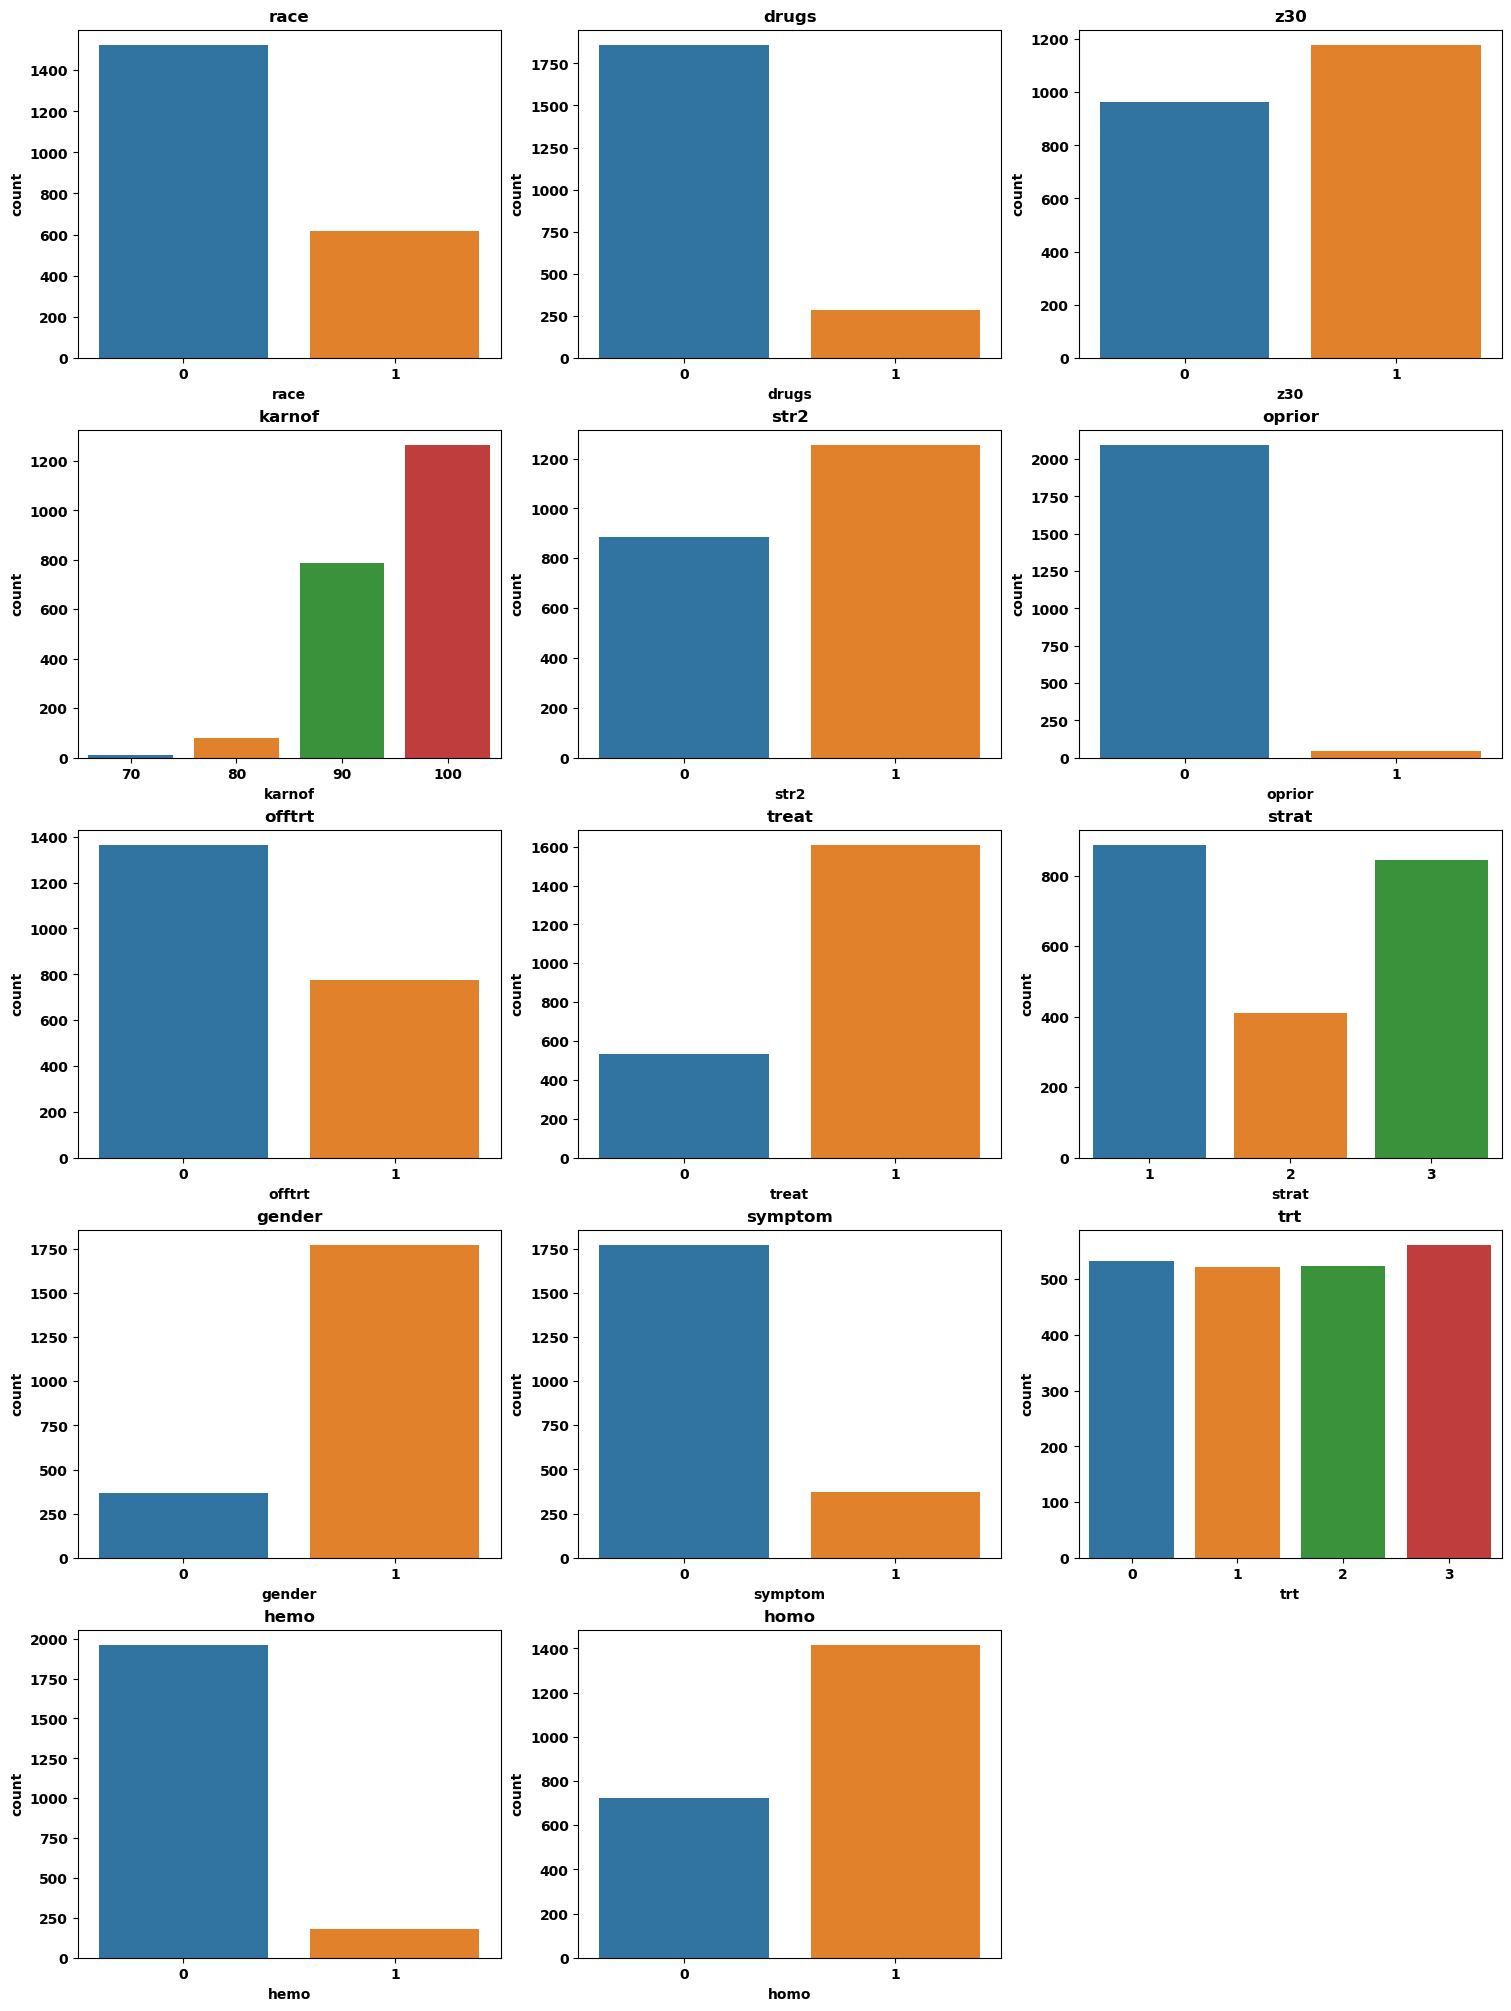

In [ ]:
num_cols = 3
num_rows = int(np.ceil(len(dis_cols) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 4), constrained_layout=True)

for i, column in enumerate(dis_cols):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

# Makine Öğrenmesi Algoritmaları

ML algoritmalarına başlamadan önce hedef değişkenimiz ve bağımsız değişkenlerimiz arasındaki korelasyonu kontrol edelim.

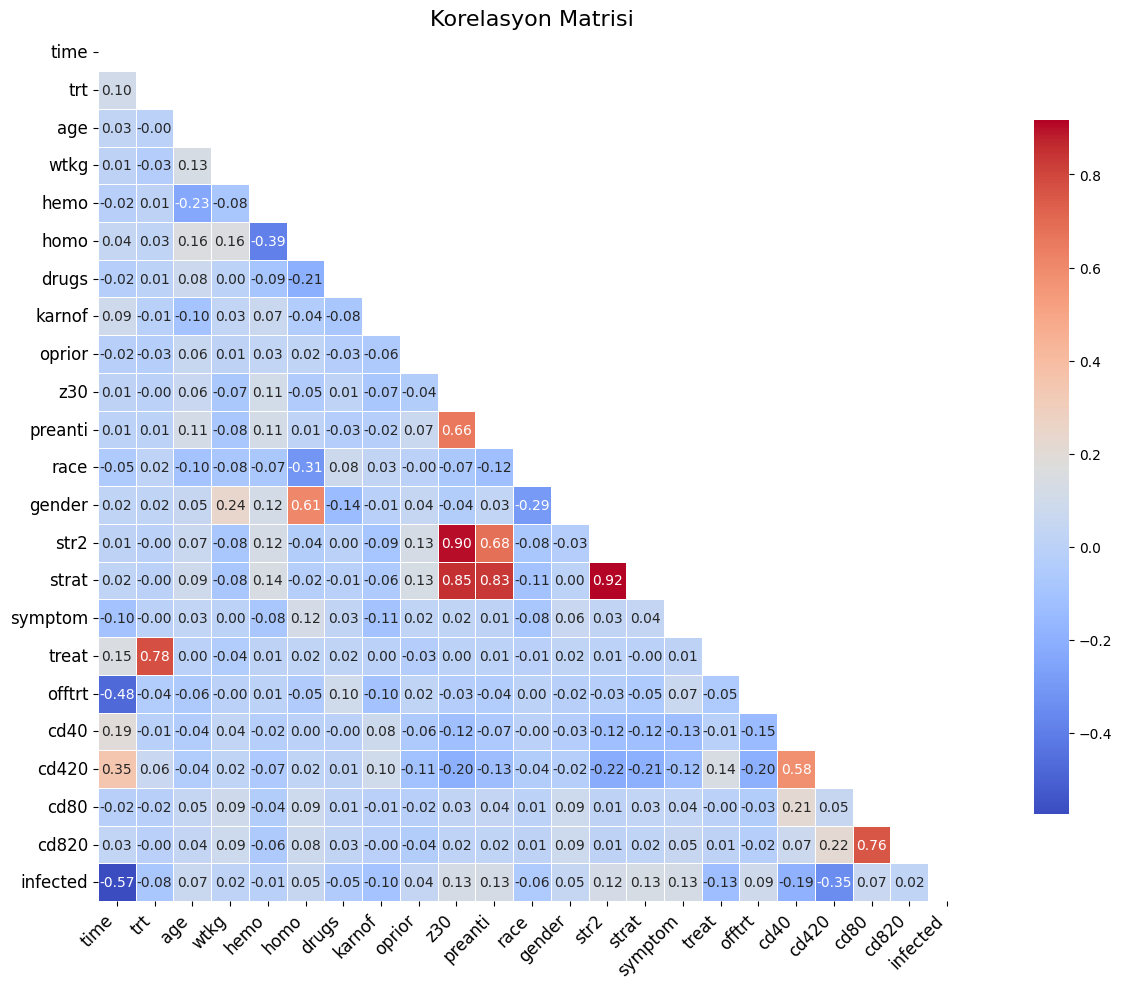

In [24]:
# Korelasyon matrisi oluşturma
corr = df.corr()

# Üçgen maske oluşturma
mask = np.triu(np.ones_like(corr, dtype=bool))

# Grafik boyutlarını ayarlama
plt.figure(figsize=(14, 10))

# Heatmap oluşturma
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=.5,
            annot_kws={"size": 10}, fmt=".2f", cbar_kws={"shrink": .8},
            square=True, xticklabels=corr.columns, yticklabels=corr.columns)

# Başlık ekleme
plt.title('Korelasyon Matrisi', fontsize=16)

# X ve Y eksenlerini ayarlama
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Grafik gösterimi
plt.tight_layout()  # Otomatik düzenleme
plt.show()

In [42]:
# hedef değişken seçimi
X = df.drop('infected', axis=1)
y = df['infected']

# standartlaştırma işlemi
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
y.value_counts()

infected
0    1618
1     521
Name: count, dtype: int64

Hedef değişkenimizdeki sınıf sayılarını kontrol ettiğimizde 1 değerini alan sınıfların 0 değerine alan sınıflara göre çok az olduğunu gördük. Yani dengesiz bir sınıf dağılımı var. Daha iyi bir model elde etmek için smote yöntemini kullanarak sınıf dengesizliğini ortadan kaldırabiliriz.

In [47]:
smote = SMOTE(random_state = 14)

X, y = smote.fit_resample(X, y)

In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5)

best_score = 0
best_random_state = None

# 1'den 100'e kadar farklı random_state değerlerini dene
for random_state in range(1, 101):
    kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
    scores = cross_val_score(knn, X, y, cv=kf)
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_random_state = random_state

from sklearn.model_selection import train_test_split

# En iyi random_state değerini kullanarak veri kümesini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)

## KNN

In [57]:
# Nihai KNN modelini eğitme
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)

# Modelin test seti üzerindeki performansını değerlendirme
accuracy = knn_final.score(X_test, y_test)
print(f'Final Model Accuracy: {accuracy:.4f}')

Final Model Accuracy: 0.8445


## SVM

In [58]:
from sklearn.svm import SVC
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık matrisi:")
print(conf_matrix)

Doğruluk: 0.9073120494335737
Karmaşıklık matrisi:
[[441  34]
 [ 56 440]]


## Karar Ağacı

In [59]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık matrisi:")
print(conf_matrix)

Doğruluk: 0.878475798146241
Karmaşıklık matrisi:
[[413  62]
 [ 56 440]]


## Lojistik regresyon

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık matrisi:")
print(conf_matrix)

Doğruluk: 0.839340885684861
Karmaşıklık matrisi:
[[420  55]
 [101 395]]


## Gradient Boosting Machines (GBM)

In [61]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
gbm_accuracy = accuracy_score(y_test, gbm_pred)

y_pred = gbm_model.predict(X_test)
print("Gradient Boosting Model Doğruluğu:", gbm_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık matrisi:")
print(conf_matrix)

Gradient Boosting Model Doğruluğu: 0.913491246138002
Karmaşıklık matrisi:
[[428  47]
 [ 37 459]]
